In [6]:
%matplotlib inline
import pysal as ps
import pandas as pd
import numpy as np
from pysal.contrib.viz import mapping as maps

In [7]:
data = ps.pdio.read_files("/Users/davidleifer/Documents/space-time-analytics/lecture3/content/data/texas.shp")

In [8]:
data.head()

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
0,Lipscomb,Texas,48,295,48295,48,295,48295,1,0.0,...,0.031817,0.286929,0.378219,0.407005,0.373005,6.724512,4.5,3.835360,6.093580,<pysal.cg.shapes.Polygon object at 0x116c21d30>
1,Sherman,Texas,48,421,48421,48,421,48421,1,0.0,...,0.139958,0.288976,0.359377,0.415453,0.378041,5.665722,1.7,3.253796,3.869407,<pysal.cg.shapes.Polygon object at 0x116c21da0>
2,Dallam,Texas,48,111,48111,48,111,48111,1,0.0,...,2.050906,0.331667,0.385996,0.370037,0.376015,7.546049,7.2,9.471366,14.231738,<pysal.cg.shapes.Polygon object at 0x116c21e10>
3,Hansford,Texas,48,195,48195,48,195,48195,1,0.0,...,0.000000,0.253527,0.357813,0.393938,0.383924,7.591786,4.7,5.542986,7.125457,<pysal.cg.shapes.Polygon object at 0x116c21e80>
4,Ochiltree,Texas,48,357,48357,48,357,48357,1,0.0,...,0.021911,0.236998,0.352940,0.343949,0.374461,5.172414,4.0,4.758392,9.159159,<pysal.cg.shapes.Polygon object at 0x116c21ef0>


In [9]:
import matplotlib.pyplot as plt

In [1]:
import geopandas as gpd

ImportError: dlopen(/Users/davidleifer/anaconda/lib/python3.5/site-packages/fiona/ogrext.so, 2): Library not loaded: @rpath/libnetcdf.11.dylib
  Referenced from: /Users/davidleifer/anaconda/lib/libgdal.20.dylib
  Reason: Incompatible library version: libgdal.20.dylib requires version 12.0.0 or later, but libnetcdf.11.dylib provides version 11.0.0

In [10]:
import fiona

In [11]:
import geopandas as gpd

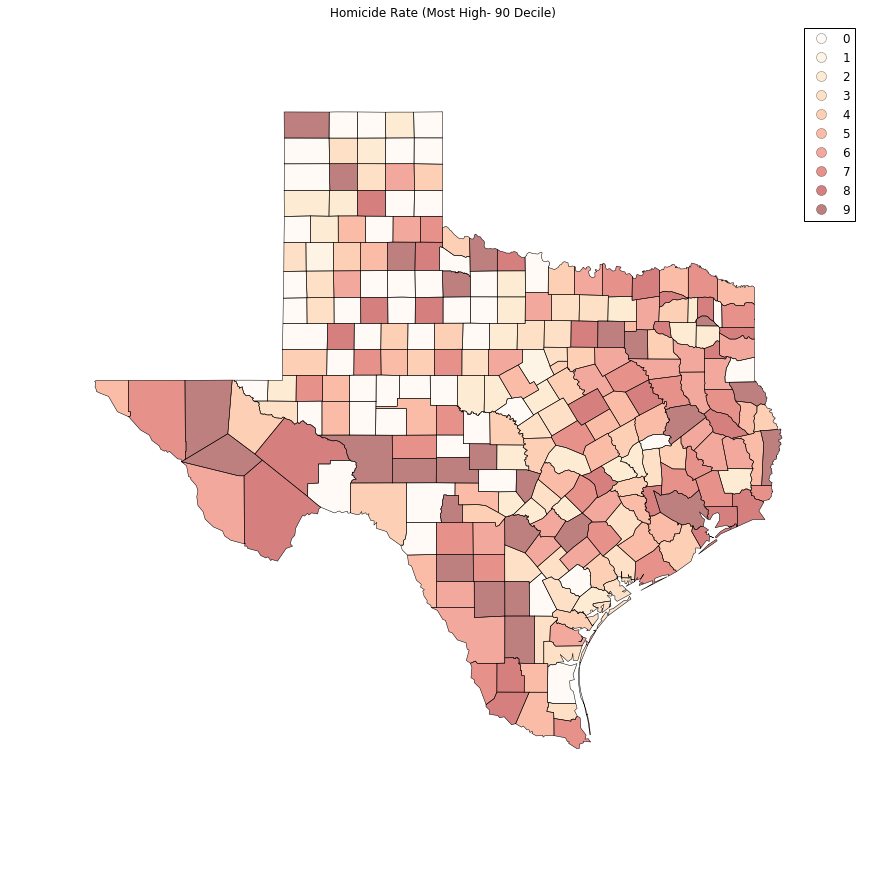

In [27]:
shp_link = "/Users/davidleifer/Documents/space-time-analytics/lecture3/content/data/texas.shp"
tx = gpd.read_file(shp_link)
hr10 = ps.Quantiles(data.HR90, k=10)
f, ax = plt.subplots(1, figsize=(15, 15))
tx.assign(cl=hr10.yb).plot(column='cl', categorical=True, \
        k=10, cmap='OrRd', linewidth=0.5, ax=ax, \
        edgecolor='black', legend=True)
ax.set_axis_off()
plt.title("Homicide Rate (Most High- 90 Decile)")
plt.show()

In [15]:
W = ps.queen_from_shapefile("/Users/davidleifer/Documents/space-time-analytics/lecture3/content/data/texas.shp")
W.transform = 'r'

In [21]:
HR90Lag = ps.lag_spatial(W, data.HR90)
HR90LagQ10 = ps.Quantiles(HR90Lag, k=10)


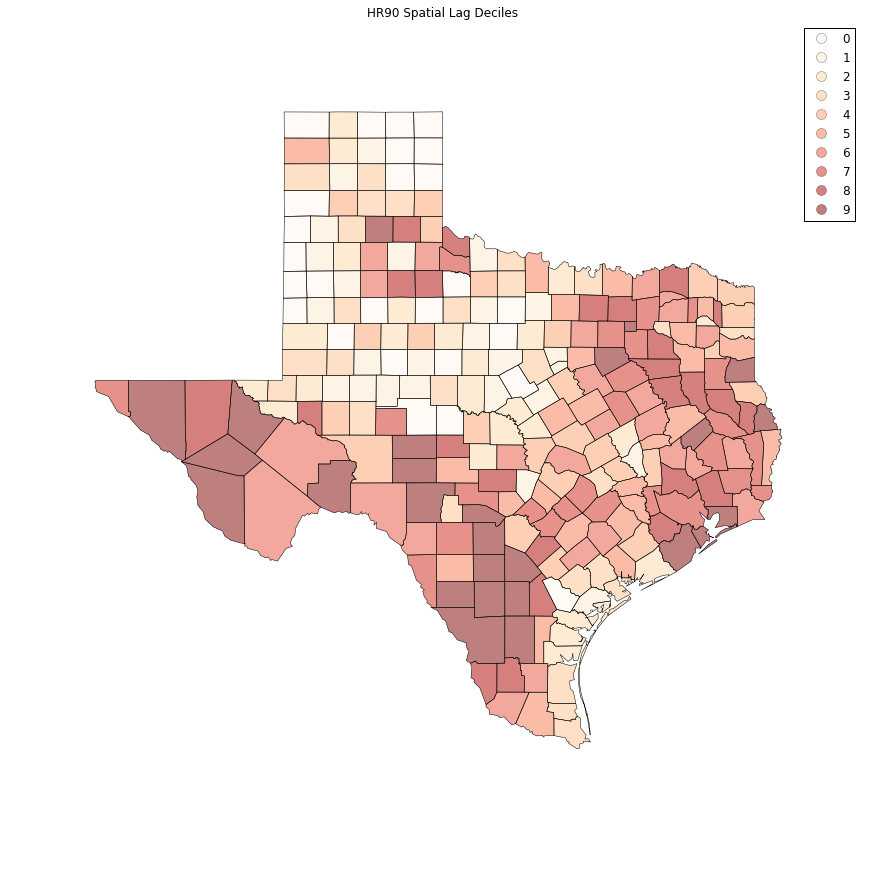

In [25]:
f, ax = plt.subplots(1, figsize=(15, 15))
tx.assign(cl=HR90LagQ10.yb).plot(column='cl', categorical=True, \
        k=10, cmap='OrRd', linewidth=0.5, ax=ax, \
        edgecolor='black', legend=True)
ax.set_axis_off()
plt.title("HR90 Spatial Lag Deciles")

plt.show()

In [28]:
HR90 = data.HR90
b,a = np.polyfit(HR90, HR90Lag, 1)

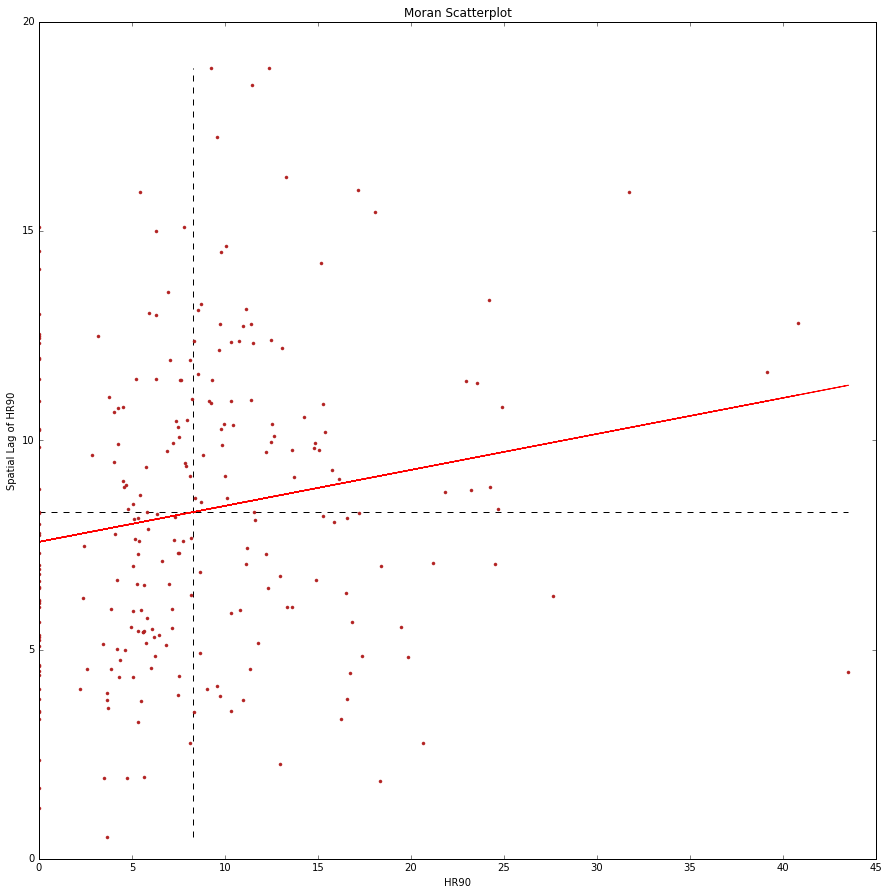

In [30]:
f, ax = plt.subplots(1, figsize=(15, 15))

plt.plot(HR90, HR90Lag, '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
plt.vlines(HR90.mean(), HR90Lag.min(), HR90Lag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(HR90Lag.mean(), HR90.min(), HR90.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(HR90, a + b*HR90, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of HR90')
plt.xlabel('HR90')
plt.show()

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
I_HR90 = ps.Moran(data.HR90.values, W)
I_HR90.I, I_HR90.p_sim


(0.085976640313889768, 0.014)

In [34]:
b

0.085976640313889394

In [38]:
I_HR90.sim[10:1000]


array([ -9.07471388e-03,   1.27651243e-02,  -3.66456672e-02,
        -3.11506473e-04,  -1.28813511e-02,  -4.11628725e-02,
        -8.15480875e-03,   1.71975756e-02,   6.80999807e-04,
        -2.02432091e-02,  -5.23828972e-02,  -6.07221219e-02,
         2.11360455e-02,  -2.76609326e-02,  -9.23749880e-02,
        -1.73550216e-02,   5.43494602e-02,  -1.70197142e-02,
        -1.63367498e-02,   5.33068348e-02,  -2.49857336e-02,
         1.67362910e-02,  -7.58849190e-02,   1.19484137e-02,
        -1.49444248e-02,  -3.42750974e-02,  -2.66608889e-03,
        -4.28554304e-02,   2.06442393e-02,   2.25491774e-02,
         5.60971756e-02,  -3.62119569e-02,   3.14152414e-02,
        -1.85747566e-02,  -5.53078108e-02,   2.18271049e-02,
        -3.33871134e-02,  -3.00647454e-02,  -1.35720630e-02,
         2.81728959e-02,  -9.74680731e-03,  -2.17272966e-02,
        -5.95587045e-02,   1.75146290e-02,   5.34554524e-03,
        -7.36500611e-02,   2.12585766e-02,  -1.93538622e-02,
        -1.25994891e-02,

In [39]:
W

/Users/davidleifer/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


(-0.2, 0.2)

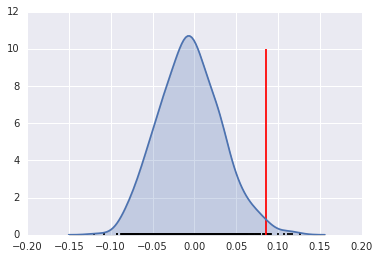

In [44]:
sns.kdeplot(I_HR90.sim, shade=True)
plt.vlines(I_HR90.sim, 0, 0.1)
plt.vlines(I_HR90.I, 0, 10, 'r')
plt.xlim([-0.2, 0.2])

In [45]:
LMo_HR90 = ps.Moran_Local(data.HR90.values, W)


In [46]:
LMo_HR90.Is[0:10], LMo_HR90.p_sim[0:10]


(array([ 1.12087323,  0.47485223, -1.22758423,  0.93868661,  0.68974296,
         0.78503173,  0.71047515,  0.41060686,  0.00740368,  0.14866352]),
 array([ 0.014,  0.149,  0.038,  0.007,  0.001,  0.009,  0.046,  0.061,
         0.465,  0.13 ]))

In [47]:
LMo_HR90 = ps.Moran_Local(data.HR90.values, W, permutations=9999)


In [48]:
Lag_HR90 = ps.lag_spatial(W, data.HR90.values)
HR90 = data.HR90.values

In [49]:
sigs = HR90[LMo_HR90.p_sim <= .001]
W_sigs = Lag_HR90[LMo_HR90.p_sim <= .001]
insigs = HR90[LMo_HR90.p_sim > .001]
W_insigs = Lag_HR90[LMo_HR90.p_sim > .001]

In [50]:
b,a = np.polyfit(HR90, Lag_HR90, 1)


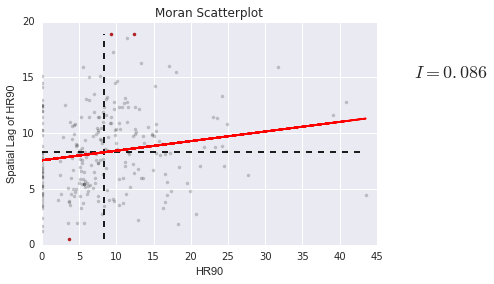

In [51]:
plt.plot(sigs, W_sigs, '.', color='firebrick')
plt.plot(insigs, W_insigs, '.k', alpha=.2)
 # dashed vert at mean of the last year's PCI
plt.vlines(HR90.mean(), Lag_HR90.min(), Lag_HR90.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(Lag_HR90.mean(), HR90.min(), HR90.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(HR90, a + b*HR90, 'r')
plt.text(s='$I = %.3f$' % I_HR90.I, x=50, y=15, fontsize=18)
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of HR90')
plt.xlabel('HR90')

In [52]:
sig = LMo_HR90.p_sim < 0.05

In [53]:
sig.sum()


42

In [54]:
hotspots = LMo_HR90.q==1 * sig

In [55]:
hotspots.sum()


9

In [56]:
coldspots = LMo_HR90.q==3 * sig
coldspots.sum()

17

In [57]:
data.HR90[hotspots]


98      9.784698
132    11.435106
164    17.129154
209    13.274924
229    12.371338
234    31.721863
236     9.584971
239     9.256549
242    18.062652
Name: HR90, dtype: float64

In [58]:
data[coldspots]

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
0,Lipscomb,Texas,48,295,48295,48,295,48295,1,0.000000,...,0.031817,0.286929,0.378219,0.407005,0.373005,6.724512,4.5,3.835360,6.093580,<pysal.cg.shapes.Polygon object at 0x116c21d30>
3,Hansford,Texas,48,195,48195,48,195,48195,1,0.000000,...,0.000000,0.253527,0.357813,0.393938,0.383924,7.591786,4.7,5.542986,7.125457,<pysal.cg.shapes.Polygon object at 0x116c21e80>
4,Ochiltree,Texas,48,357,48357,48,357,48357,1,0.000000,...,0.021911,0.236998,0.352940,0.343949,0.374461,5.172414,4.0,4.758392,9.159159,<pysal.cg.shapes.Polygon object at 0x116c21ef0>
5,Roberts,Texas,48,393,48393,48,393,48393,1,0.000000,...,0.000000,0.320275,0.318656,0.398681,0.339626,5.762712,5.3,6.231454,4.885993,<pysal.cg.shapes.Polygon object at 0x116c21f60>
13,Wheeler,Texas,48,483,48483,48,483,48483,1,0.000000,...,2.619493,0.312700,0.411916,0.422483,0.369445,8.687864,7.2,7.210179,10.006064,<pysal.cg.shapes.Polygon object at 0x116c26320>
19,Deaf Smith,Texas,48,117,48117,48,117,48117,1,2.527742,...,1.602882,0.326435,0.411071,0.397815,0.424793,7.113629,6.7,7.848195,12.963702,<pysal.cg.shapes.Polygon object at 0x116c265c0>
21,Castro,Texas,48,069,48069,48,69,48069,1,3.735664,...,2.877619,0.369599,0.420224,0.405567,0.420278,5.595409,5.3,7.384850,7.876106,<pysal.cg.shapes.Polygon object at 0x116c266a0>
32,Lamb,Texas,48,279,48279,48,279,48279,1,4.567044,...,5.453822,0.340662,0.435044,0.408710,0.428881,7.693704,6.5,6.724512,10.753209,<pysal.cg.shapes.Polygon object at 0x116c26b70>
33,Bailey,Texas,48,017,48017,48,17,48017,1,7.334067,...,1.755379,0.342457,0.431008,0.433146,0.425405,5.674378,5.3,8.508733,7.206759,<pysal.cg.shapes.Polygon object at 0x116c26be0>
48,Hockley,Texas,48,219,48219,48,219,48219,1,7.460460,...,4.227447,0.294757,0.384968,0.391222,0.394487,6.194043,6.4,7.247796,10.114800,<pysal.cg.shapes.Polygon object at 0x116c2e2b0>


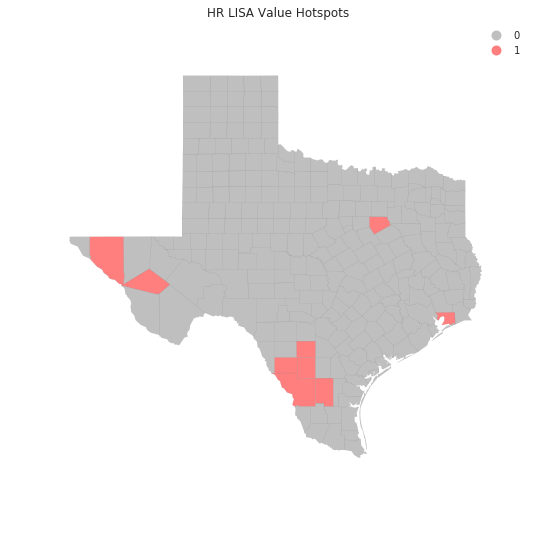

In [61]:
from matplotlib import colors
hmap = colors.ListedColormap(['grey', 'red'])
f, ax = plt.subplots(1, figsize=(9, 9))
tx.assign(cl=hotspots*1).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='grey', legend=True)
ax.set_axis_off()
plt.title("HR LISA Value Hotspots")
plt.show()

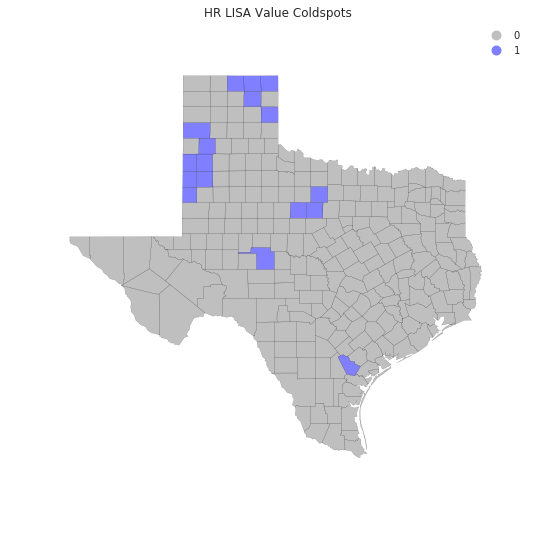

In [62]:
cmap = colors.ListedColormap(['grey', 'blue'])
f, ax = plt.subplots(1, figsize=(9, 9))
tx.assign(cl=coldspots*1).plot(column='cl', categorical=True, \
        k=2, cmap=cmap, linewidth=0.1, ax=ax, \
        edgecolor='black', legend=True)
ax.set_axis_off()
plt.title("HR LISA Value Coldspots")
plt.show()

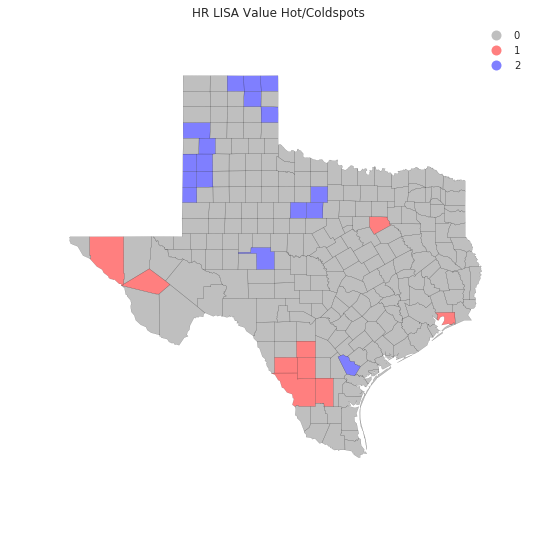

In [63]:
from matplotlib import colors
hcmap = colors.ListedColormap(['grey', 'red','blue'])
hotcold = hotspots*1 + coldspots*2
f, ax = plt.subplots(1, figsize=(9, 9))
tx.assign(cl=hotcold).plot(column='cl', categorical=True, \
        k=2, cmap=hcmap,linewidth=0.1, ax=ax, \
        edgecolor='black', legend=True)
ax.set_axis_off()
plt.title("HR LISA Value Hot/Coldspots")
plt.show()

/Users/davidleifer/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


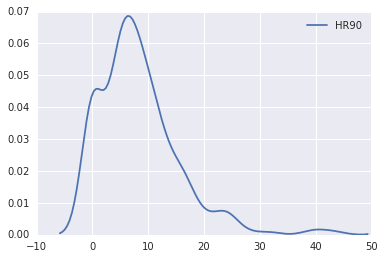

In [64]:
sns.kdeplot(data.HR90)


/Users/davidleifer/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


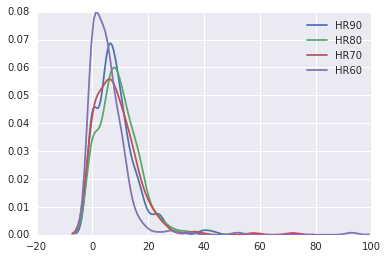

In [65]:
sns.kdeplot(data.HR90)
sns.kdeplot(data.HR80)
sns.kdeplot(data.HR70)
sns.kdeplot(data.HR60)